In [1]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


C:\Users\nived\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# with h5py.File("train_data.hdf5", 'r') as hf:
#     xdata = hf['data'][:]
#     ydata = hf['label'][:]

feat_train = np.load("emotion_train_data.npy")
feat_train = feat_train.reshape(feat_train.shape[0],300,300,1)



In [7]:
label_train = np.load("emotion_train_label.npy")

In [4]:
feat_test = np.load("emotion_test_data.npy")
feat_test = feat_test.reshape(feat_test.shape[0],300,300,1)

In [5]:
label_test = np.load("emotion_test_label.npy")

In [8]:
print("Dimension of traindata",np.shape(feat_train))
print("Dimension of testdata",np.shape(feat_test))
print("Dimension of trainlabel",np.shape(label_train))
print("Dimension of testlabel",np.shape(label_test))

Dimension of traindata (31180, 300, 300, 1)
Dimension of testdata (7796, 300, 300, 1)
Dimension of trainlabel (31180, 8)
Dimension of testlabel (7796, 8)


In [10]:
print(ydata)

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


In [4]:
xdata = xdata.reshape(xdata.shape[0],300,300,1)
# ydata = ydata.reshape(feat_test.shape[0],28,28,1)
# xdata = xdata.astype('float32')
# feat_test = feat_test.astype('float32')
# feat_train/=255
# feat_test/=255
# label_train = to_categorical(l_train,10)
# label_test = to_categorical(l_test,10)
# print(label_train.shape)
# print(label_test.shape)

In [4]:
feat_train,feat_test,label_train,label_test = train_test_split(xdata,ydata,test_size = 0.2)

MemoryError: 

In [6]:
from sklearn.utils import shuffle
xdata,ydata = shuffle(xdata, ydata, random_state=0)

MemoryError: 

In [9]:
import keras
import sys
import math
from keras.utils import to_categorical
np.random.seed(123)
import tensorflow as tf
tf.set_random_seed(123)
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import optimizers
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1,save_best_only=True)


Using TensorFlow backend.


(None, 300, 300, 6)
(None, 150, 150, 6)
(None, 146, 146, 16)
(None, 73, 73, 16)
(None, 120)
(None, 80)
(None, 8)
Train on 31180 samples, validate on 7796 samples
Epoch 1/10
 - 298s - loss: 0.8396 - acc: 0.6769 - val_loss: 0.6982 - val_acc: 0.7478

Epoch 00001: val_loss improved from inf to 0.69823, saving model to weights.hdf5
Epoch 2/10
 - 246s - loss: 0.6070 - acc: 0.7854 - val_loss: 0.6300 - val_acc: 0.7923

Epoch 00002: val_loss improved from 0.69823 to 0.63004, saving model to weights.hdf5
Epoch 3/10
 - 247s - loss: 0.4813 - acc: 0.8267 - val_loss: 0.6050 - val_acc: 0.7926

Epoch 00003: val_loss improved from 0.63004 to 0.60500, saving model to weights.hdf5
Epoch 4/10
 - 255s - loss: 0.3533 - acc: 0.8719 - val_loss: 0.6557 - val_acc: 0.7928

Epoch 00004: val_loss did not improve from 0.60500
Epoch 5/10
 - 260s - loss: 0.2357 - acc: 0.9137 - val_loss: 0.8089 - val_acc: 0.7935

Epoch 00005: val_loss did not improve from 0.60500
Epoch 6/10
 - 264s - loss: 0.1531 - acc: 0.9441 - val_l

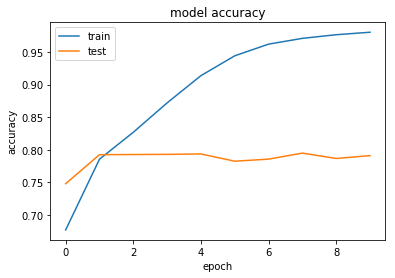

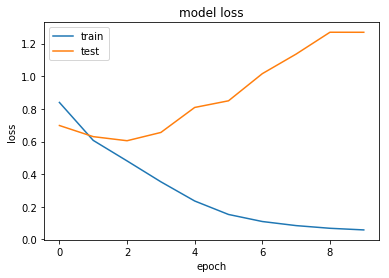

In [10]:
cnn_model = Sequential()

cnn_model.add(Conv2D(6, [5,5],padding='same', activation='relu', use_bias=True,input_shape=(300,300,1),kernel_initializer = 'RandomUniform'))
print(cnn_model.output_shape)

cnn_model.add(MaxPooling2D(pool_size=(2,2)))
print(cnn_model.output_shape)

cnn_model.add(Conv2D(16, [5,5],padding='valid', activation='relu', use_bias=True))
print(cnn_model.output_shape)

cnn_model.add(MaxPooling2D(pool_size=(2,2)))
print(cnn_model.output_shape)

cnn_model.add(Flatten())
cnn_model.add(Dense(120, activation='relu', use_bias=True))
cnn_model.add(Dropout(0.2))
print(cnn_model.output_shape)
cnn_model.add(Dense(80, activation='relu', use_bias=True))
print(cnn_model.output_shape)
# cnn_model.add(Dense(10, activation='softmax'))
# print(cnn_model.output_shape)

# cnn_model.add(Conv2D(64, [3,3],padding='same', activation='relu', use_bias=True,input_shape=(300,300,1),kernel_initializer = 'RandomUniform'))
# print(cnn_model.output_shape)

# cnn_model.add(MaxPooling2D(pool_size=(2,2)))
# print(cnn_model.output_shape)

# cnn_model.add(Conv2D(128, [3,3],padding='same', activation='relu', use_bias=True))
# print(cnn_model.output_shape)

# cnn_model.add(MaxPooling2D(pool_size=(2,2)))
# print(cnn_model.output_shape)

# cnn_model.add(Conv2D(256, [3,3],padding='same', activation='relu', use_bias=True))
# print(cnn_model.output_shape)

# cnn_model.add(MaxPooling2D(pool_size=(2,2)))
# print(cnn_model.output_shape)

# cnn_model.add(Conv2D(512, [3,3],padding='same', activation='relu', use_bias=True))
# print(cnn_model.output_shape)

# cnn_model.add(MaxPooling2D(pool_size=(2,2)))
# print(cnn_model.output_shape)

# cnn_model.add(Conv2D(512, [3,3],padding='same', activation='relu', use_bias=True))
# print(cnn_model.output_shape)

# cnn_model.add(MaxPooling2D(pool_size=(2,2)))
# print(cnn_model.output_shape)

# cnn_model.add(Flatten())
# cnn_model.add(Dense(4096, activation='relu', use_bias=True))
# cnn_model.add(Dropout(0.2))
# print(cnn_model.output_shape)
# cnn_model.add(Dense(4096, activation='relu', use_bias=True))
# print(cnn_model.output_shape)
cnn_model.add(Dense(8, activation='softmax'))
print(cnn_model.output_shape)

#lr *= (1. / (1. + self.decay * self.iterations))
learning_rate = 0.05
decay_rate = learning_rate / 100
momentum = 0.8
#
sgd = optimizers.SGD(lr = learning_rate,momentum = momentum,decay=decay_rate)
cnn_model.compile(loss='categorical_crossentropy',optimizer= 'adam',metrics=['accuracy'])
history = cnn_model.fit(feat_train,label_train,epochs = 10,batch_size=128, verbose = 2,validation_data = (feat_test,label_test),callbacks=[checkpointer])
performance = cnn_model.evaluate(feat_test,label_test,verbose = 0)
print('Test Loss:', performance[0])
print('Test Accuracy: ', performance[1])
performance = cnn_model.evaluate(feat_train,label_train,verbose = 0)
print('Train Loss:', performance[0])
print('Train Accuracy: ', performance[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
from keras.utils import plot_model
import os
plot_model(cnn_model, to_file= 'model.png', show_shapes=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [11]:
with h5py.File("history.hdf5", 'w') as hf:
    hf.create_dataset('Train Accuracy', data = np.asarray(history.history['acc']))
    hf.create_dataset('Validation Accuracy', data = np.asarray(history.history['val_acc']))
    hf.create_dataset('Train Error', data = np.asarray(history.history['loss']))
    hf.create_dataset('Validation Error', data = np.asarray(history.history['val_loss']))

In [12]:
print( history.history['acc'])

[0.6768762026940346, 0.7854393842665334, 0.8267479152997539, 0.8718729954487701, 0.9136626042411296, 0.944098781300631, 0.9620269403004967, 0.9708787683954294, 0.9764913405570714, 0.980275817809004]


In [14]:
cnn_model.save('trial_1.h5')